# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Jean Swiegers**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [222]:
# Libraries for data loading, data manipulation and data visulisation

%matplotlib inline
import numpy as np #handling of arrays and mathematical functions
import pandas as pd #dataframe manipulation
import matplotlib.pyplot as plt #for plotting data
import seaborn as sns #plotting data
import pickle as pickle #save and load model
import scipy as sp #used during conversion of temperature to pressure

# Libraries for data preparation and model building
from sklearn.preprocessing           import OrdinalEncoder, StandardScaler #scaling and encoding data
from sklearn.experimental            import enable_iterative_imputer #required to run iterative imputer
from sklearn.impute                  import IterativeImputer #imputes missing missing data
from pycaret.regression              import * #for best model selection
from sklearn.metrics                 import mean_squared_error #used to calculate MSE then RMSE
from sklearn.feature_selection       import RFE #Recursive feature selection
from sklearn.ensemble                import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor #regressors for model building
from sklearn.model_selection         import train_test_split #to split data for training
import xgboost as xgb #regressor for modelling
import lightgbm as lgb #regressor for modelling

# Setting global constants to ensure notebook results are reproducible
random_state_global = 42
num_estimators = 100
feature_selection_threshold = 1

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [223]:
train_df = pd.read_csv("df_train.csv", low_memory=False, parse_dates=['time'])
test_df = pd.read_csv("df_test.csv", low_memory=False, parse_dates=['time'])
test_time = test_df.copy()

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [224]:
# look at data statistics

check and the shape of data:

In [225]:
train_df.shape

(8763, 49)

In [226]:
test_df.shape

(2920, 48)

Have a quick look at the datasets to get an overview of what we're dealing with. I transpose the data so we can see all column names

In [227]:
train_df.head().T

0                    1  \
Unnamed: 0                              0                    1   
time                  2015-01-01 03:00:00  2015-01-01 06:00:00   
Madrid_wind_speed                0.666667             0.333333   
Valencia_wind_deg                 level_5             level_10   
Bilbao_rain_1h                        0.0                  0.0   
Valencia_wind_speed              0.666667             1.666667   
Seville_humidity                74.333333            78.333333   
Madrid_humidity                      64.0            64.666667   
Bilbao_clouds_all                     0.0                  0.0   
Bilbao_wind_speed                     1.0                  1.0   
Seville_clouds_all                    0.0                  0.0   
Bilbao_wind_deg                223.333333                221.0   
Barcelona_wind_speed             6.333333                  4.0   
Barcelona_wind_deg              42.666667                139.0   
Madrid_clouds_all                     0.0                  0.0   
Seville_wind_speed               3.333333             3.333333   
Barcelona_rain_1h                     0.0                  0.0   
Seville_pressure                     sp25                 sp25   
Seville_rain_1h                       0.0                  0.0   
Bilbao_snow_3h                        0.0                  0.0   
Barcelona_pressure            1036.333333          1037.333333   
Seville_rain_3h                       0.0                  0.0   
Madrid_rain_1h                        0.0                  0.0   
Barcelona_rain_3h                     0.0                  0.0   
Valencia_snow_3h                      0.0                  0.0   
Madrid_weather_id                   800.0                800.0   
Barcelona_weather_id                800.0                800.0   
Bilbao_pressure                    1035.0          1035.666667   
Seville_weather_id                  800.0                800.0   
Valencia_pressure             1002.666667          1004.333333   
Seville_temp_max               274.254667              274.945   
Madrid_pressure                971.333333           972.666667   
Valencia_temp_max                 269.888           271.728333   
Valencia_temp                     269.888           271.728333   
Bilbao_weather_id                   800.0                800.0   
Seville_temp                   274.254667              274.945   
Valencia_humidity               75.666667                 71.0   
Valencia_temp_min                 269.888           271.728333   
Barcelona_temp_max                281.013           280.561667   
Madrid_temp_max                   265.938           266.386667   
Barcelona_temp                    281.013           280.561667   
Bilbao_temp_min                269.338615              270.376   
Bilbao_temp                    269.338615              270.376   
Barcelona_temp_min                281.013           280.561667   
Bilbao_temp_max                269.338615              270.376   
Seville_temp_min               274.254667              274.945   
Madrid_temp                       265.938           266.386667   
Madrid_temp_min                   265.938           266.386667   
load_shortfall_3h             6715.666667          4171.666667   

                                        2                    3  \
Unnamed: 0                              2                    3   
time                  2015-01-01 09:00:00  2015-01-01 12:00:00   
Madrid_wind_speed                     1.0                  1.0   
Valencia_wind_deg                 level_9              level_8   
Bilbao_rain_1h                        0.0                  0.0   
Valencia_wind_speed                   1.0                  1.0   
Seville_humidity                71.333333            65.333333   
Madrid_humidity                 64.333333            56.333333   
Bilbao_clouds_all                     0.0                  0.0   
Bilbao_wind_speed                     1.0                  1.0   
Seville_cloud

In [228]:
train_df.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count  8763.000000        8763.000000     8763.000000          8763.000000   
mean   4381.000000           2.425729        0.135753             2.586272   
std    2529.804538           1.850371        0.374901             2.411190   
min       0.000000           0.000000        0.000000             0.000000   
25%    2190.500000           1.000000        0.000000             1.000000   
50%    4381.000000           2.000000        0.000000             1.666667   
75%    6571.500000           3.333333        0.100000             3.666667   
max    8762.000000          13.000000        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       8763.000000      8763.000000        8763.000000   
mean          62.658793        57.414717          43.469132   
std           22.621226        24.335396          32.551044   
min            8.333333         6.333333           0.000000   
25%           44.333333        36.333333          10.000000   
50%           65.666667        58.000000          45.000000   
75%           82.000000        78.666667          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  ...  \
count        8763.000000         8763.000000      8763.000000  ...   
mean            1.850356           13.714748       158.957511  ...   
std             1.695888           24.272482       102.056299  ...   
min             0.000000            0.000000         0.000000  ...   
25%             0.666667            0.000000        73.333333  ...   
50%             1.000000            0.000000       147.000000  ...   
75%             2.666667           20.000000       234.000000  ...   
max            12.666667           97.333333       359.333333  ...   

       Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
count      8763.000000     8763.000000      8763.000000  8763.000000   
mean        289.540309      289.855459       285.017973   286.422929   
std           9.752047        6.528111         6.705672     6.818682   
min         264.983333      270.816667       264.483333   267.483333   
25%         282.150000      284.973443       280.085167   281.374167   
50%         288.116177      289.416667       284.816667   286.158333   
75%         296.816667      294.909000       289.816667   291.034167   
max         314.483333      307.316667       309.816667   310.710000   

       Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  \
count         8763.000000      8763.000000       8763.000000  8763.000000   
mean           288.447422       287.966027        291.633356   288.419439   
std              6.102593         7.105590          8.178220     9.346796   
min            269.483333       269.063000        270.150000   264.983333   
25%            284.150000       282.836776        285.816667   281.404281   
50%            288.150000       287.630000        290.816667   287.053333   
75%            292.966667       292.483333        297.150000   295.154667   
max            304.816667       317.966667        314.816667   313.133333   

       Madrid_temp_min  load_shortfall_3h  
count      8763.000000        8763.000000  
mean        287.202203       10673.857612  
std           9.206237        5218.046404  
min         264.983333       -6618.000000  
25%         280.299167        7390.333333  
50%         286.083333       11114.666667  
75%         293.884500       14498.166667  
max         310.383333       31904.000000  

[8 rows x 46 columns]

In [229]:
test_df.head().T

0                    1  \
Unnamed: 0                           8763                 8764   
time                  2018-01-01 00:00:00  2018-01-01 03:00:00   
Madrid_wind_speed                     5.0             4.666667   
Valencia_wind_deg                 level_8              level_8   
Bilbao_rain_1h                        0.0                  0.0   
Valencia_wind_speed                   5.0             5.333333   
Seville_humidity                     87.0                 89.0   
Madrid_humidity                 71.333333                 78.0   
Bilbao_clouds_all                    20.0                  0.0   
Bilbao_wind_speed                     3.0             3.666667   
Seville_clouds_all                    0.0                  0.0   
Bilbao_wind_deg                193.333333           143.333333   
Barcelona_wind_speed                  4.0             4.666667   
Barcelona_wind_deg             176.666667           266.666667   
Madrid_clouds_all                     0.0                  0.0   
Seville_wind_speed                    1.0             0.666667   
Barcelona_rain_1h                     0.0                  0.0   
Seville_pressure                     sp25                 sp25   
Seville_rain_1h                       0.0                  0.0   
Bilbao_snow_3h                          0                    0   
Barcelona_pressure            1017.333333          1020.333333   
Seville_rain_3h                       0.0                  0.0   
Madrid_rain_1h                        0.0                  0.0   
Barcelona_rain_3h                     0.0                  0.0   
Valencia_snow_3h                        0                    0   
Madrid_weather_id                   800.0                800.0   
Barcelona_weather_id                800.0           800.333333   
Bilbao_pressure               1025.666667          1026.666667   
Seville_weather_id                  800.0                800.0   
Valencia_pressure                     NaN                  NaN   
Seville_temp_max               284.483333           282.483333   
Madrid_pressure                    1030.0          1030.333333   
Valencia_temp_max              287.483333               284.15   
Valencia_temp                  287.483333               284.15   
Bilbao_weather_id                   801.0                721.0   
Seville_temp                   283.673333           281.673333   
Valencia_humidity               46.333333            53.666667   
Valencia_temp_min              287.483333               284.15   
Barcelona_temp_max             287.816667           284.816667   
Madrid_temp_max                280.816667           280.483333   
Barcelona_temp                 287.356667               284.19   
Bilbao_temp_min                    276.15           277.816667   
Bilbao_temp                        280.38               281.01   
Barcelona_temp_min             286.816667           283.483333   
Bilbao_temp_max                    285.15               284.15   
Seville_temp_min                   283.15               281.15   
Madrid_temp                    279.866667           279.193333   
Madrid_temp_min                    279.15               278.15   

                                        2                    3  \
Unnamed: 0                           8765                 8766   
time                  2018-01-01 06:00:00  2018-01-01 09:00:00   
Madrid_wind_speed                2.333333             2.666667   
Valencia_wind_deg                 level_7              level_7   
Bilbao_rain_1h                        0.0                  0.0   
Valencia_wind_speed                   5.0             5.333333   
Seville_humidity                     89.0            93.333333   
Madrid_humidity                 89.666667            82.666667   
Bilbao_clouds_all                     0.0            26.666667   
Bilbao_wind_speed                2.333333             5.666667   
Seville_clouds_all               6.666667             6.666667   
Bilbao_wind_d

In [230]:
test_df.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count   2920.000000        2920.000000     2920.000000          2920.000000   
mean   10222.500000           2.457820        0.067517             3.012785   
std      843.075718           1.774838        0.153381             1.996340   
min     8763.000000           0.000000        0.000000             0.000000   
25%     9492.750000           1.333333        0.000000             1.666667   
50%    10222.500000           2.000000        0.000000             2.333333   
75%    10952.250000           3.333333        0.000000             4.000000   
max    11682.000000          13.333333        1.600000            14.333333   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       2920.000000      2920.000000        2920.000000   
mean          67.123516        62.644463          43.355422   
std           20.611292        24.138393          30.486298   
min           11.666667         8.000000           0.000000   
25%           52.000000        43.000000          13.333333   
50%           70.333333        63.000000          45.000000   
75%           85.000000        84.000000          75.000000   
max          100.000000       100.000000          97.333333   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  ...  \
count        2920.000000         2920.000000      2920.000000  ...   
mean            2.283562           15.477283       162.643836  ...   
std             1.654787           25.289197        97.749873  ...   
min             0.000000            0.000000         0.000000  ...   
25%             1.000000            0.000000        86.666667  ...   
50%             1.666667            0.000000       140.000000  ...   
75%             3.333333           20.000000       233.333333  ...   
max            10.666667           93.333333       360.000000  ...   

       Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  \
count         2920.000000      2920.000000     2920.000000      2920.000000   
mean           290.695462       288.888393      289.911289       284.920684   
std              7.113599         9.089699        7.119411         6.803424   
min            273.816667       269.816667      272.650000       266.483333   
25%            284.816667       281.483333      284.307500       280.150000   
50%            290.150000       287.483333      289.483333       284.483333   
75%            296.483333       295.483333      295.816667       289.816667   
max            309.483333       313.483333      308.150000       307.483333   

       Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  \
count  2920.000000         2920.000000      2920.000000       2920.000000   
mean    286.522375          289.124971       288.483641        290.152431   
std       6.492355            7.168049         6.221324          7.906915   
min     268.120000          271.483333       270.138667        271.150000   
25%     281.778333          283.483333       284.150000        284.483333   
50%     286.265000          288.816667       288.483333        289.150000   
75%     291.119167          295.150000       292.816667        295.150000   
max     308.966667          306.816667       310.816667        314.483333   

       Madrid_temp  Madrid_temp_min  
count  2920.000000      2920.000000  
mean    287.869763       286.618130  
std       8.977511         8.733163  
min     268.713333       267.816667  
25%     280.816667       279.816667  
50%     286.396667       285.483333  
75%     294.452500       293.150000  
max     312.223333       310.150000  

[8 rows x 45 columns]

In [231]:
train_df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

In [232]:
test_df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.494269
Bilbao_rain_1h           3.404307
Valencia_wind_speed      1.328872
Seville_humidity        -0.508637
Madrid_humidity         -0.135537
Bilbao_clouds_all       -0.124933
Bilbao_wind_speed        1.381876
Seville_clouds_all       1.628723
Bilbao_wind_deg          0.322569
Barcelona_wind_speed     1.080200
Barcelona_wind_deg      -0.029036
Madrid_clouds_all        0.925034
Seville_wind_speed       1.346297
Barcelona_rain_1h        5.989675
Seville_rain_1h          6.269205
Bilbao_snow_3h           0.000000
Barcelona_pressure      -0.572509
Seville_rain_3h         54.037024
Madrid_rain_1h           5.211963
Barcelona_rain_3h       40.017330
Valencia_snow_3h         0.000000
Madrid_weather_id       -2.439600
Barcelona_weather_id    -2.577583
Bilbao_pressure         -0.952458
Seville_weather_id      -3.103741
Valencia_pressure       -1.779108
Seville_temp_max         0.473503
Madrid_pressure         -2.608926
Valencia_temp_

In [233]:
train_df.kurt()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

In [234]:
test_df.kurt()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.567383
Bilbao_rain_1h            16.905396
Valencia_wind_speed        2.100244
Seville_humidity          -0.710306
Madrid_humidity           -1.134569
Bilbao_clouds_all         -1.488942
Bilbao_wind_speed          2.306390
Seville_clouds_all         1.417797
Bilbao_wind_deg           -1.017392
Barcelona_wind_speed       1.410571
Barcelona_wind_deg        -0.956300
Madrid_clouds_all         -0.566527
Seville_wind_speed         2.369604
Barcelona_rain_1h         52.069367
Seville_rain_1h           48.243445
Bilbao_snow_3h             0.000000
Barcelona_pressure         1.175366
Seville_rain_3h         2920.000000
Madrid_rain_1h            41.250278
Barcelona_rain_3h       1642.238858
Valencia_snow_3h           0.000000
Madrid_weather_id          5.349404
Barcelona_weather_id       6.056749
Bilbao_pressure            1.866927
Seville_weather_id         9.557456
Valencia_pressure          4.966557
Seville_temp_max          -0

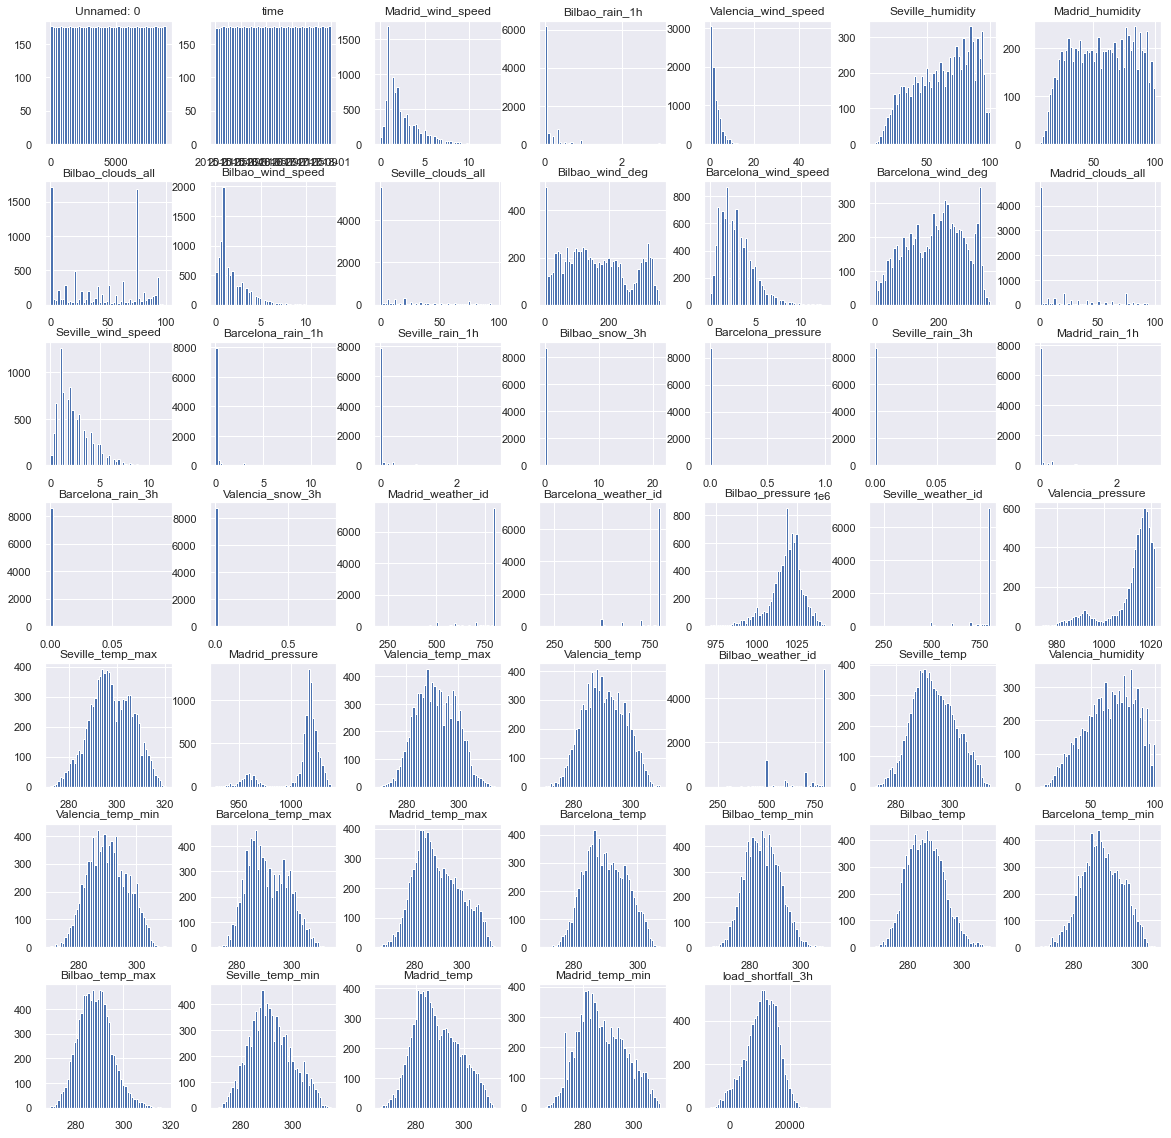

In [235]:
# plotting all features to see the distribution of values
train_df.hist(bins=50, figsize=(20,20))
plt.show()

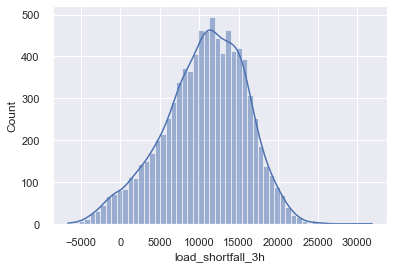

In [236]:
#plot the target variable, data seems to be normally distributed
sns.histplot(x='load_shortfall_3h', data=train_df, kde=True);

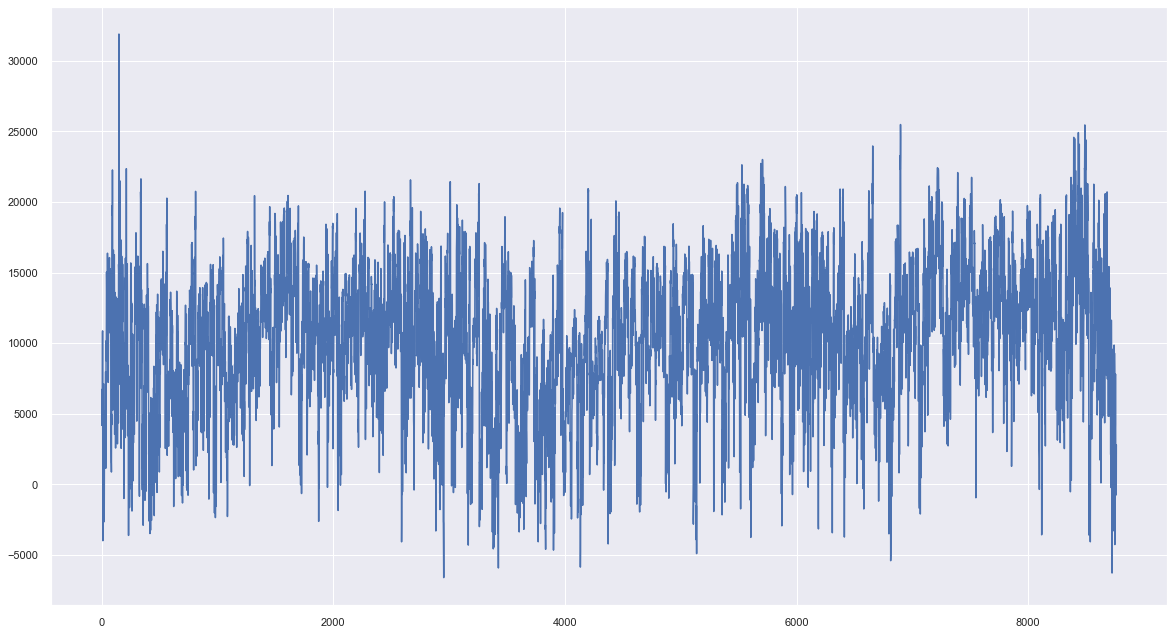

In [237]:
#plot the target variable to get an idea of how the data is distributed
plt.figure(figsize=(20,11))
plt.plot(train_df['load_shortfall_3h'])

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

First thing I need to do is clean the data for processing. To start, I will drop the first column in both datasets as it is unknown data.

In [238]:
train_df = train_df.drop(columns=['Unnamed: 0'])
test_df = test_df.drop(columns=['Unnamed: 0'])

In [239]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   Madrid_wind_speed     8763 non-null   float64       
 2   Valencia_wind_deg     8763 non-null   object        
 3   Bilbao_rain_1h        8763 non-null   float64       
 4   Valencia_wind_speed   8763 non-null   float64       
 5   Seville_humidity      8763 non-null   float64       
 6   Madrid_humidity       8763 non-null   float64       
 7   Bilbao_clouds_all     8763 non-null   float64       
 8   Bilbao_wind_speed     8763 non-null   float64       
 9   Seville_clouds_all    8763 non-null   float64       
 10  Bilbao_wind_deg       8763 non-null   float64       
 11  Barcelona_wind_speed  8763 non-null   float64       
 12  Barcelona_wind_deg    8763 non-null   float64       
 13  Madrid_clouds_all 

I will now correct the dtypes to float64/int for remaining columns so we only work with numerical data

In [241]:
#Encode Valencia_wind_deg to be float64 dtype and remove prefix 'level_'
encode = OrdinalEncoder()
train_df['Valencia_wind_deg'] = encode.fit_transform(train_df[['Valencia_wind_deg']])
test_df['Valencia_wind_deg'] = encode.fit_transform(test_df[['Valencia_wind_deg']])

In [242]:
#look at the result
train_df['Valencia_wind_deg'].head()

0    5.0
1    1.0
2    9.0
3    8.0
4    7.0
Name: Valencia_wind_deg, dtype: float64

Next, I try to fix the Seville pressure column by applying Amontons’s/Gay-Lussac’s law to calculate the atmospheric pressure from the Seville temperature column which presumeably is in Kelvin units.

#I first tried to fix 'Seville_pressure' by adding 1000 and replacing 'sp' values to make them relevant to the rest of the dataset pressure columns but the former technique seems more accurate in testing.

In [243]:
train_df['Seville_pressure']

0       sp25
1       sp25
2       sp25
3       sp25
4       sp25
        ... 
8758    sp23
8759    sp23
8760    sp22
8761    sp23
8762    sp25
Name: Seville_pressure, Length: 8763, dtype: object

In [244]:
#Setting Boltzmann Constant from Scipy:
boltzmannConstant = sp.constants.Boltzmann

#set the standard atmospheric pressure at sea leavel:
atm_pres = 1013.25

In [245]:
#convert temperature to atmospheric pressure values calculated from the Seville temperature column values at specific point in time:

#create empty list to append new values to:
converted_pressure = []
for temp in train_df['Seville_temp']:
#applying formula for retrieving atmospheric pressure at the given temperature value:
    pressure = atm_pres * np.exp((-5.6e-26 * 9.8 * 680) / (boltzmannConstant * float(temp))) + 100
#append pressure values to list:
    converted_pressure.append(pressure)
#replace values in Seville pressure with newly created values    
train_df['Seville_pressure'] = converted_pressure

# #applying the same procedure for the test_df:

#create empty list to append new values to:
converted_pressure = []
for temp in test_df['Seville_temp']:
#applying formula for retrieving atmospheric pressure at the given temperature value:
    pressure = atm_pres * np.exp((-5.6e-26 * 9.8 * 680) / (boltzmannConstant * float(temp))) + 100
#append pressure values to list:
    converted_pressure.append(pressure)
#replace values in Seville pressure with newly created values    
test_df['Seville_pressure'] = converted_pressure

Seville pressures seems to fit in with the rest of the pressure columns now.

In [246]:
train_df['Seville_pressure'].describe()

count    8763.000000
mean     1024.183556
std         2.285287
min      1017.422146
25%      1022.564755
50%      1024.052360
75%      1025.843678
max      1029.924716
Name: Seville_pressure, dtype: float64

To use the Datetime features in numerical only model, I will need to extract the year, month, day, hour values to their own respective int dtype columns

# Engineer existing features and add new features

In [247]:
# extract datetime feature for more detailed information and to their own respective numerical columns for modelling
train_df['year'] = train_df['time'].dt.year
test_df['year'] = test_df['time'].dt.year
train_df['is_year_start'] = train_df['time'].dt.is_year_start
test_df['is_year_start'] = test_df['time'].dt.is_year_start
train_df['is_year_end'] = train_df['time'].dt.is_year_end
test_df['is_year_end'] = test_df['time'].dt.is_year_end
train_df['months'] = train_df['time'].dt.month
test_df['months'] = test_df['time'].dt.month
train_df['is_month_start'] = train_df['time'].dt.is_month_start
test_df['is_month_start'] = test_df['time'].dt.is_month_start
train_df['is_month_end'] = train_df['time'].dt.is_month_end
test_df['is_month_end'] = test_df['time'].dt.is_month_end
train_df['weekday'] = train_df['time'].dt.weekday.astype(float)
test_df['weekday'] = test_df['time'].dt.weekday.astype(float)
train_df['week_of_year'] = train_df['time'].dt.weekofyear
test_df['week_of_year'] = test_df['time'].dt.weekofyear
train_df['quarter'] = train_df['time'].dt.quarter.astype(float)
test_df['quarter'] = test_df['time'].dt.quarter.astype(float)
train_df['week'] = train_df['time'].dt.isocalendar().week.astype(float)
test_df['week'] = test_df['time'].dt.isocalendar().week.astype(float)
train_df['day_of_the_year'] = train_df['time'].dt.dayofyear.astype(float)
test_df['day_of_the_year'] = test_df['time'].dt.dayofyear.astype(float)
train_df['day'] = train_df['time'].dt.day
test_df['day'] = test_df['time'].dt.day
train_df['hour'] = train_df['time'].dt.hour
test_df['hour'] = test_df['time'].dt.hour
train_df['minute'] = train_df['time'].dt.minute
test_df['minute'] = test_df['time'].dt.minute
train_df['second'] = train_df['time'].dt.second
test_df['second'] = test_df['time'].dt.second

In [248]:
#drop unused columns:
train_df.drop(['time'], axis=1, inplace=True)
test_df.drop(['time'], axis=1, inplace=True)

In [249]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   float64
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

Check the missing values in both dataframes:

I see Valencia_pressure is missing values in both datasets. lets further investigate:

In [250]:
#setting variables for missing values
train_missing = train_df.Valencia_pressure.isna().sum()
test_missing = test_df.Valencia_pressure.isna().sum()

lets check the percentage of missing data to decide to use the column or not.

In [251]:
print(f'train_df nan percentage Valencia_pressure: {round((train_missing / train_df.Valencia_pressure.shape[0]) * 100, 2)}%')
print(f'test_df nan percentage Valencia_pressure: {round((test_missing / test_df.Valencia_pressure.shape[0]) * 100, 2)}%')

train_df nan percentage Valencia_pressure: 23.6%
test_df nan percentage Valencia_pressure: 15.55%


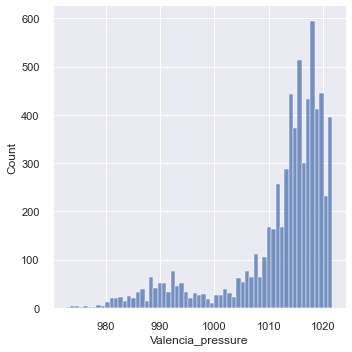

In [252]:
#before applying IterativeImputer to nan values in Valencia pressure
sns.displot(train_df.Valencia_pressure)

In [253]:
train_df.shape

(8763, 62)

The data column Valencia_pressure is definitely skewed to the left (long tail in the left). In that case it would be a good idea to fill the missing data for both train and test datasets.

In [255]:
#using the iterative imputer to impute missing values in Valencia pressure
imputer = IterativeImputer(random_state=0, max_iter=100)
train_imputed = imputer.fit_transform(train_df)
test_imputed = imputer.fit_transform(test_df)
train_df = pd.DataFrame(train_imputed, columns=train_df.columns)
test_df = pd.DataFrame(test_imputed, columns=test_df.columns)

In [256]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   float64
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

In [257]:
# #confirm no nan values
train_df['Valencia_pressure'].isnull().sum()

0

In [258]:
# #confirm no nan values
test_df['Valencia_pressure'].isnull().sum()

0

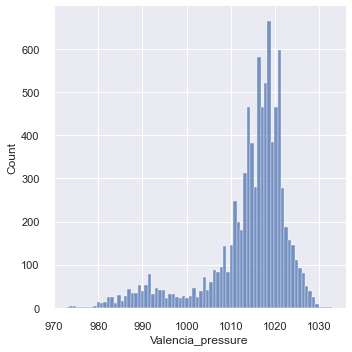

In [259]:
#after applying IterativeImputer to nan values in Valencia pressure
sns.displot(train_df.Valencia_pressure)

#as you can see, the values are less skewed after imputation.

With all data in numerical form we are almost ready to model the data.

In [260]:
#look at the correlation matrix
train_df.corr()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
Madrid_wind_speed             1.000000           0.104954        0.259719   
Valencia_wind_deg             0.104954           1.000000        0.044209   
Bilbao_rain_1h                0.259719           0.044209        1.000000   
Valencia_wind_speed           0.513092           0.204874        0.265864   
Seville_humidity             -0.117892           0.141594        0.069878   
...                                ...                ...             ...   
day_of_the_year              -0.238991          -0.088451       -0.181232   
day                          -0.029954          -0.025467        0.072752   
hour                          0.186228          -0.028266        0.054527   
minute                             NaN                NaN             NaN   
second                             NaN                NaN             NaN   

                     Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
Madrid_wind_speed               0.513092         -0.117892        -0.137092   
Valencia_wind_deg               0.204874          0.141594         0.171478   
Bilbao_rain_1h                  0.265864          0.069878         0.106765   
Valencia_wind_speed             1.000000         -0.075227        -0.019388   
Seville_humidity               -0.075227          1.000000         0.799831   
...                                  ...               ...              ...   
day_of_the_year                -0.235317         -0.106347        -0.070122   
day                            -0.000340          0.032979         0.047372   
hour                            0.204103         -0.424982        -0.307872   
minute                               NaN               NaN              NaN   
second                               NaN               NaN              NaN   

                     Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
Madrid_wind_speed             0.244001           0.377854            0.191251   
Valencia_wind_deg             0.074476           0.112475            0.109314   
Bilbao_rain_1h                0.370733           0.085398            0.081131   
Valencia_wind_speed           0.210524           0.386478            0.163675   
Seville_humidity              0.061680          -0.088180            0.399436   
...                                ...                ...                 ...   
day_of_the_year              -0.114651          -0.086620           -0.167835   
day                           0.025688          -0.008020            0.010582   
hour                         -0.023714           0.197848           -0.017401   
minute                             NaN                NaN                 NaN   
second                             NaN                NaN                 NaN   

                     Bilbao_wind_deg  ...  is_month_end       weekday  \
Madrid_wind_speed           0.270950  ...      0.024697 -4.042128e-04   
Valencia_wind_deg           0.105466  ...     -0.004770  1.255927e-02   
Bilbao_rain_1h              0.279350  ...      0.019982  3.232531e-02   
Valencia_wind_speed         0.248643  ...      0.019686  1.896518e-02   
Seville_humidity           -0.087246  ...      0.018929  8.265003e-03   
...                              ...  ...           ...           ...   
day_of_the_year            -0.171474  ...      0.024411 -8.589549e-05   
day                         0.034253  ...      0.308091 -2.721985e-03   
hour                        0.110457  ...      0.000041  6.141191e-07   
minute                           NaN  ...           NaN           NaN   
second                           NaN  ...           NaN           NaN   

                     week_of_year   quarter      week  day_of_the_year  \
Madrid_wind_speed       -0.236441 -0.243397 -0.236441        -0.238991   
Valencia_wind_deg       -0.082436 -0.091006 -0.082436        -0.088451   
Bilbao_rain_1h          -0.179233 -0.195982 -0.179233        -0.181232   
V

Heatmap to plot the correlation between features. There is high correlation between the different temperature columns. As well as humidity, rain and temperature columns

In [261]:
sns.set(rc = {'figure.figsize':(25,20)})
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True, cmap = 'RdYlGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

To make train_test_split easier, i will be joining the two dataframes, but keeping in mind not to cause data leakage.

In [262]:
# set X and y values for training the models
X = train_df.drop(['load_shortfall_3h'],axis=1)
y = train_df[['load_shortfall_3h']]

## Scaling the data

Scale the dataset for better predictability when using Random Forests Regressor and other Regressor models.

In [263]:
# I use the Standard scaler to standardize the data because we have outliers, the Standard Scaler will work better than MinMax Scaler.
scale = StandardScaler()
#fit all features to the scaler and split the target variable from features for train_test_split
X_scaled = scale.fit_transform(X)

#train_test_split for model testing later on
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_state_global)

#select features only before feature selection:
train_X = train_df.drop(['load_shortfall_3h'], axis=1)
test_X = test_df

## Feature selection with LGBM Regressor and feature_importance_

In [264]:
#lightGBM model fit
gbm = lgb.LGBMRegressor()
gbm.fit(X, y)
gbm.booster_.feature_importance()

# importance of each attribute
feat_imp_ = pd.DataFrame({'columns':X.columns, 'fea_imp':gbm.feature_importances_})
feat_imp_.loc[feat_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

columns  fea_imp
57                   day      387
56       day_of_the_year      231
58                  hour      221
25       Bilbao_pressure      151
18    Barcelona_pressure      134
52               weekday      133
53          week_of_year      110
46                  year       89
27     Valencia_pressure       89
34     Valencia_humidity       75
0      Madrid_wind_speed       71
7      Bilbao_wind_speed       61
5        Madrid_humidity       58
9        Bilbao_wind_deg       56
11    Barcelona_wind_deg       56
39       Bilbao_temp_min       55
3    Valencia_wind_speed       52
29       Madrid_pressure       50
35     Valencia_temp_min       47
10  Barcelona_wind_speed       46
6      Bilbao_clouds_all       46
43      Seville_temp_min       46
28      Seville_temp_max       42
49                months       42
4       Seville_humidity       40
32     Bilbao_weather_id       40
42       Bilbao_temp_max       39
38        Barcelona_temp       39
45       Madrid_temp_min       38
41    Barcelona_temp_min       38
12     Madrid_clouds_all       34
37       Madrid_temp_max       33
1      Valencia_wind_deg       31
8     Seville_clouds_all       30
40           Bilbao_temp       29
36    Barcelona_temp_max       28
24  Barcelona_weather_id       27
50        is_month_start       25
13    Seville_wind_speed       22
15      Seville_pressure       21
23     Madrid_weather_id       20
30     Valencia_temp_max       19
26    Seville_weather_id       19
31         Valencia_temp       17
44           Madrid_temp       15
19       Seville_rain_3h       15
14     Barcelona_rain_1h       13
51          is_month_end        6
2         Bilbao_rain_1h        6
16       Seville_rain_1h        4
20        Madrid_rain_1h        3
17        Bilbao_snow_3h        1

# Recursive Feature Elimination(RFE)
RFE is a good choice because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

In [265]:
# create the RFE model and select top ranked attributes
rfe = RFE(gbm)
rfe = rfe.fit(train_X, y)

# summarize the ranking of the attributes
#set show all rows
pd.set_option('display.max_rows', 61)
feat_rank_ = pd.DataFrame({'columns':train_X.columns, 'fea_rank':rfe.ranking_})
feat_rank_.loc[feat_rank_.fea_rank <= feature_selection_threshold].sort_values(by=['fea_rank'], ascending = True)

columns  fea_rank
0      Madrid_wind_speed         1
56       day_of_the_year         1
53          week_of_year         1
52               weekday         1
46                  year         1
45       Madrid_temp_min         1
43      Seville_temp_min         1
42       Bilbao_temp_max         1
41    Barcelona_temp_min         1
39       Bilbao_temp_min         1
38        Barcelona_temp         1
37       Madrid_temp_max         1
35     Valencia_temp_min         1
34     Valencia_humidity         1
29       Madrid_pressure         1
28      Seville_temp_max         1
27     Valencia_pressure         1
25       Bilbao_pressure         1
24  Barcelona_weather_id         1
18    Barcelona_pressure         1
11    Barcelona_wind_deg         1
10  Barcelona_wind_speed         1
9        Bilbao_wind_deg         1
7      Bilbao_wind_speed         1
6      Bilbao_clouds_all         1
5        Madrid_humidity         1
4       Seville_humidity         1
3    Valencia_wind_speed         1
57                   day         1
58                  hour         1

In [266]:
#assigning most important features for modelling

#create list of column names
top_feat_list = feat_rank_.loc[feat_rank_.fea_rank <= 1]['columns'].tolist()

#assign dataframe columns for modelling
train_X_sel = train_X[top_feat_list]
test_X_sel = test_X[top_feat_list]

In [268]:
#correlation after feature selection, there are still some correlated features

sns.set(rc = {'figure.figsize':(25,20)})
heatmap = sns.heatmap(train_X_sel.corr(), vmin=-1, vmax=1, annot=True, cmap = 'RdYlGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

## Best model selection using Pycaret:

Using Pycaret I can have an overview of the best performing models for this particular dataset. Again, looking at the best performing RMSE value

In [269]:
best_model_select = setup(data=train_X_sel, target=y)

In [ ]:
best = compare_models()

Initiated  . . . . . . . . . . . . . . . . . .          13:55:51
Status     . . . . . . . . . . . . . . . . . .  Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Lasso Regression

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Lets apply the top 5 models selected by Pycaret and compare the RSME results applying the test_train_split data from the training set:

In [ ]:
#function to return the rmse for models:
def get_rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
%%time
#modelling with the LGBMRegressor (seems like the best result, will use it in my final model
LGBmodel = lgb.LGBMRegressor()
LGBmodel.fit(X_train, y_train)
y_pred_lgb = LGBmodel.predict(X_test)
get_rmse(y_test, y_pred_lgb)

In [ ]:
%%time
#modelling with the XGBRegressor
xgb_model = xgb.XGBRegressor(n_estimators=20, random_state=random_state_global, n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
get_rmse(y_test, y_pred_xgb)

In [ ]:
%%time
#modelling with the RandomForestRegressor() also using cross validation
rfr_model = RandomForestRegressor(n_estimators=num_estimators, random_state=random_state_global, n_jobs=-1)
rfr_model.fit(X_train, y_train)
y_pred_rfr = rfr_model.predict(X_test)
get_rmse(y_test, y_pred_rfr)

In [ ]:
%%time
#modelling with the GradientBoostingRegressor()
gbr_model = GradientBoostingRegressor(n_estimators=num_estimators, random_state=random_state_global)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
get_rmse(y_test, y_pred_gbr)

In [ ]:
%%time
#modelling with the ExtraTreesRegressor()
etr_model = ExtraTreesRegressor(n_estimators=10, random_state=random_state_global, n_jobs=-1)
etr_model.fit(X_train, y_train)
y_pred_etr = etr_model.predict(X_test)
get_rmse(y_test, y_pred_etr)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

# Choose best model and motivate why it is the best choice

In [ ]:
#selecting the model with the best rmse from LGB Regressor with training data
model_list = [LGBmodel, xgb_model, rfr_model, gbr_model, etr_model]
best_model = None
best_rmse = 4000
for model in model_list:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = get_rmse(y_test, y_pred_lgb)
    if rmse < best_rmse:
        best_model = LGBmodel
        best_rmse = round(rmse, 6)
        print(f'The best model is: {best_model} with RSME of {best_rmse}')

In [ ]:
# Compare model performances on the training data
fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=4, sharey=True)
predictions = [y_pred_lgb, y_pred_rfr, y_pred_xgb, y_pred_gbr]
titles = ['Light GBM', 'Random forest', 'XGBoost', 'Gradient Boost']

#for loop through all the predictions and plot each prediction
for p in range(4):
    rmse = round(np.sqrt(mean_squared_error(predictions[p], y_test)), 6)
    ax[p].set_title(titles[p]+" (RMSE: "+ str(rmse)+")")
    ax[p].set_ylabel('Prediction')
    ax[p].set_xlabel('Actual value')
    ax[p].scatter(y_test, predictions[p])
plt.show()

In [ ]:
#fitting and returning the best model values for submission
best_model = best_model.fit(train_X_sel, y)
y_pred_best = best_model.predict(test_X_sel)
y_pred_best

In [ ]:
# save the best model using pickle
# filename = 'best_model.sav'
# pickle.dump(best_model, open(filename, 'wb'))

#save the .pkl for flask deployment
filename='best_model.pkl'
pickle.dump(y_pred_best, open(filename, 'wb'))

The Light Gradient Boosting Regressor outperformed the other 4 top models chosen by Pycaret. It had the best RMSE when predicting with the testing data.

## Creation of my Kaggle submission 

In [ ]:
#create load_shortfall_3h column
test_time['load_shortfall_3h'] = y_pred_best.tolist()

#subset columns for output format
df_final_sub = test_time[['time', 'load_shortfall_3h']]
df_final_sub.drop_duplicates(subset='time', keep='first', inplace=True, ignore_index=False)

#Export data to csv
df_final_sub.to_csv('final_prediction.csv', index=False)

In [ ]:
#test loading the model using pickle:
loaded_model = pickle.load(open('best_model.sav', 'rb'))
output = best_model.score(train_X_sel, y)
print(output)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

## Discuss chosen methods logic

I chose the Light Gradient boosting regressor for a few reasons:

It outperformed the other 4 tested models I fitted with the dataset. It got the lowest RMSE. It uses little memory, it has good accuracy and is extremely fast in training speed because it uses a histogram-based algorithm, it buckets continuous feature values into discrete bins which fasten the training procedure. LightGBM does not grow a tree level-wise (row by row) as most other implementations do. Instead it grows trees leaf-wise. It chooses the leaf it believes will yield the largest decrease in loss. Since I only used numerical data it performs faster and more accurately.